In [244]:
# Cricket is one of the most popular sports in the world, especially in countries like India, Pakistan, Australia, and England.
# The Cricket World Cup is held every four years and attracts millions of fans.
# In this project, you will analyze Cricket World Cup match data to discover trends, compare team performances, 
# and visualize key statistics — no machine learning is required.

### Dataset Link: ###
# https://www.kaggle.com/datasets/sidmalang/all-cricket-world-cup-match-result

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [246]:
from pathlib import Path

df = pd.DataFrame()

dataset = ['world_cup_1975.csv',  'world_cup_1987.csv',  'world_cup_1999.csv',  'world_cup_2011.csv',
'world_cup_1979.csv',  'world_cup_1991.csv',  'world_cup_2003.csv',  'world_cup_2015.csv',
'world_cup_1983.csv',  'world_cup_1995.csv',  'world_cup_2007.csv', 'world_cup_2019.csv']

# Concatenating all the csv data

# Matching column names for sanme data 
# Also making seprate column for cities if available
for filename in dataset:
    path = Path('./dataset').joinpath(filename)
    data = pd.read_csv(path)

    if data.columns[3].__contains__('Location'):
        
        data.rename(columns={'Ground / Location':'Ground'},inplace=True)

        ground, city = [],[]

        for elem in data['Ground']:
            
            splitted = elem.split(',')
            
            ground.append(splitted[0])
            city.append(splitted[1].strip())

        data['Ground'] = ground
        data['City'] = city

    # Seperating countries while also keeping match data -- both seperate
    if data.columns[2].__contains__('Match'):
        match, countries = [], []

        for elem in data['Match']:

            splitted = elem.split(':')
            countries.append(splitted[1].strip())
            match.append(splitted[0])

        data['Match'] = match
        data['Countries'] = countries

    df = pd.concat([df,data], ignore_index=True)

In [247]:
# checking if dataframe is consistent
df.head(10)

,Id,Date,Countries,Ground,Result,Match,City
0,1,07/06/1975,England v. India,Lord's,England won by 202 runs,NaN,NaN
1,2,07/06/1975,East Africa v. New Zealand,Edgbaston,New Zealand won by 181 runs,NaN,NaN
2,3,07/06/1975,Australia v. Pakistan,Headingley,Australia won by 73 runs,NaN,NaN
3,4,07/06/1975,Sri Lanka v. West Indies,Old Trafford,West Indies won by 9 wickets,NaN,NaN
4,5,11/06/1975,England v. New Zealand,Trent Bridge,England won by 80 runs,NaN,NaN
5,6,11/06/1975,East Africa v. India,Headingley,India won by 10 wickets,NaN,NaN
6,7,11/06/1975,Australia v. Sri Lanka,Kennington Oval,Australia won by 52 runs,NaN,NaN
7,8,11/06/1975,Pakistan v. West Indies,Edgbaston,West Indies won by 1 wicket,NaN,NaN
8,9,14/06/1975,England v. East Africa,Edgbaston,England won by 196 runs,NaN,NaN
9,10,14/06/1975,India v. New Zealand,Old Trafford,New Zealand won by 4 wickets,NaN,NaN


In [248]:
df.tail(10)

,Id,Date,Countries,Ground,Result,Match,City
444,39,01/07/2019,Sri Lanka v West Indies,Riverside Ground,Sri Lanka won by 23 runs,39th Match,Chester-Le-Street
445,40,02/07/2019,Bangladesh v India,Edgbaston,India won by 28 runs,40th Match,Birmingham
446,41,03/07/2019,England v New Zealand,Riverside Ground,England won by 119 runs,41st Match,Chester-Le-Street
447,42,04/07/2019,Afghanistan v West Indies,Headingley,West Indies won by 23 runs,42nd Match,Leeds
448,43,05/07/2019,Bangladesh v Pakistan,Lord's,Pakistan won by 94 runs,43rd Match,London
449,44,06/07/2019,India v Sri Lanka,Headingley,India won by 7 wickets,44th Match,Leeds
450,45,06/07/2019,Australia v South Africa,Old Trafford,South Africa won by 10 runs,45th Match,Manchester
451,46,09/07/2019,India v New Zealand,Old Trafford,New Zealand won by 18 runs,1st Semi Final,Manchester
452,47,11/07/2019,England v Australia,Edgbaston,England won by 8 wickets,2nd Semi Final,Birmingham
453,48,14/07/2019,England v New Zealand,Lord's,England won in super over after scores were tied,Final,London


In [249]:
df.shape

(454, 7)

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         454 non-null    int64 
 1   Date       454 non-null    object
 2   Countries  454 non-null    object
 3   Ground     454 non-null    object
 4   Result     454 non-null    object
 5   Match      125 non-null    object
 6   City       125 non-null    object
dtypes: int64(1), object(6)
memory usage: 25.0+ KB


<h1><b>Data Cleaning</b></h1>

In [251]:
# Checking null values

df.isnull().sum()

Id             0
Date           0
Countries      0
Ground         0
Result         0
Match        329
City         329
dtype: int64

<h4>No such cleaning or data filling is required as we wont be dealign with Match column much</h4>

<h1><b>EDA.</b></h1>

In [252]:
# Total number of matches played

total_match = df.shape[0]
print(f"Total match played {total_match}")

Total match played 454


In [253]:
# Countries that has the highest win percentage

# Lets make a seprate column for the winning team

countries = []

for result in df['Result']:
    team = result.split(' won')
    countries.append(team[0])

df['Winner'] = countries

In [254]:
# TOP 10
winners = df.groupby('Winner').size().sort_values(ascending=False)
winners.head(10)

Winner
Australia       72
New Zealand     57
India           53
England         48
Pakistan        43
West Indies     43
South Africa    38
Sri Lanka       38
Bangladesh      14
Zimbabwe        11
dtype: int64

In [255]:
# Ground which hosted the most matches

# TOP 10

ground = df.groupby('Ground').size().sort_values(ascending=False)
ground.head(10)

Ground
Old Trafford                17
Edgbaston                   16
Headingley                  16
Kennington Oval             16
Trent Bridge                16
Melbourne Cricket Ground    15
Lord's                      15
Sydney Cricket Ground       14
Eden Park                   12
Adelaide Oval               11
dtype: int64

In [256]:
# How many matches ended without a result

no_result = df[df['Result'] == 'No result']
print(f'A total of {no_result.shape[0]} matches ened with no results.')
no_result

A total of 7 matches ened with no results.


,Id,Date,Countries,Ground,Result,Match,City,Winner
74,33,06/06/1999,New Zealand v. Zimbabwe,Headingley,No result,NaN,NaN,No result
156,9,28/02/1992,India v Sri Lanka,Harrup Park,No result,9th Match,Mackay,No result
160,13,01/03/1992,England v Pakistan,Adelaide Oval,No result,13th Match,Adelaide,No result
202,16,18/02/2003,West Indies v. Bangladesh,Willowmoore Park,No result,NaN,NaN,No result
228,42,04/03/2003,Zimbabwe v. Pakistan,Queens Sports Club,No result,NaN,NaN,No result
332,16,26/02/1996,Kenya v Zimbabwe,Moin-ul-Haq Stadium,No result,16th Match,Patna,No result
420,15,10/06/2019,South Africa v West Indies,The Rose Bowl,No result,15th Match,Southampton,No result


<h1>Visualization</h1>

<BarContainer object of 11 artists>

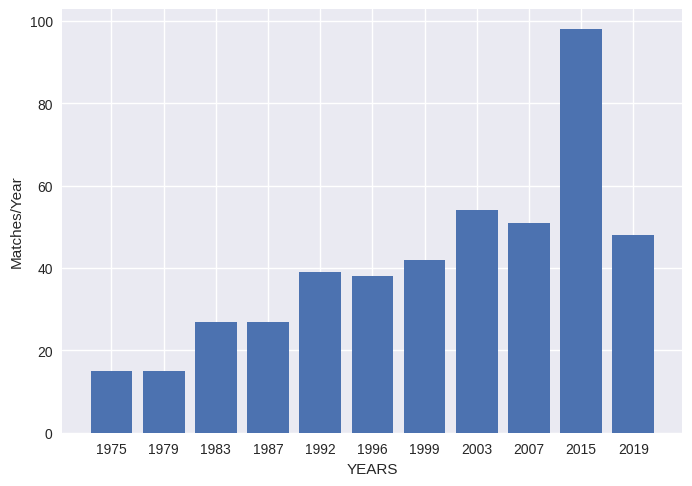

In [257]:
# Lets visualize number of matches, year by year.

plt.style.use('seaborn-v0_8')
group_date = df.groupby(df['Date'].str[-4:]).size()

fig, ax = plt.subplots()

ax.set_xlabel('YEARS')
ax.set_ylabel('Matches/Year')
ax.bar(x=group_date.index.to_list(), height=group_date.to_list())

<BarContainer object of 19 artists>

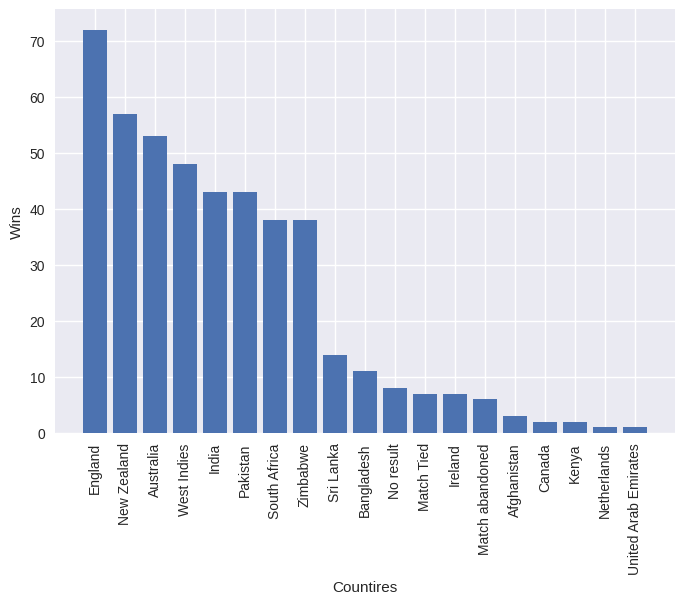

In [258]:
# Visualizing if ground had any affect on winning teams

plt.tick_params(axis='x', rotation = 90)
plt.xlabel('Countires')
plt.ylabel('Wins')
plt.bar(df['Winner'].unique(),height=df['Winner'].value_counts())